In [1]:
%matplotlib inline

# Locks Analysis

In [9]:
import os 
import json 

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

sns.set_style('whitegrid')
sns.set_context('poster')

In [3]:
def load_jsonl(path):
    with open(path, 'r') as f:
        for line in f:
            yield json.loads(line)

## Server Analysis

In [4]:
SERVER = os.path.join("data", "nevis.cs.umd.edu", "server.jsonl")

def load_server_jsonl(path):
    clients = 0 
    for idx, row in enumerate(load_jsonl(path)):
        if idx % 4 == 0:
            clients += 1 
        row["clients"] = clients 
        yield row

        
data = pd.DataFrame(load_server_jsonl(SERVER))

In [5]:
# Add in the multi-key boolean
data['multikey'] = data['nkeys'] > 1

In [6]:
data.dtypes

clients         int64
duration      float64
finished       object
nkeys           int64
reads           int64
started        object
store          object
syncs          object
throughput    float64
timestamp      object
writes          int64
multikey         bool
dtype: object

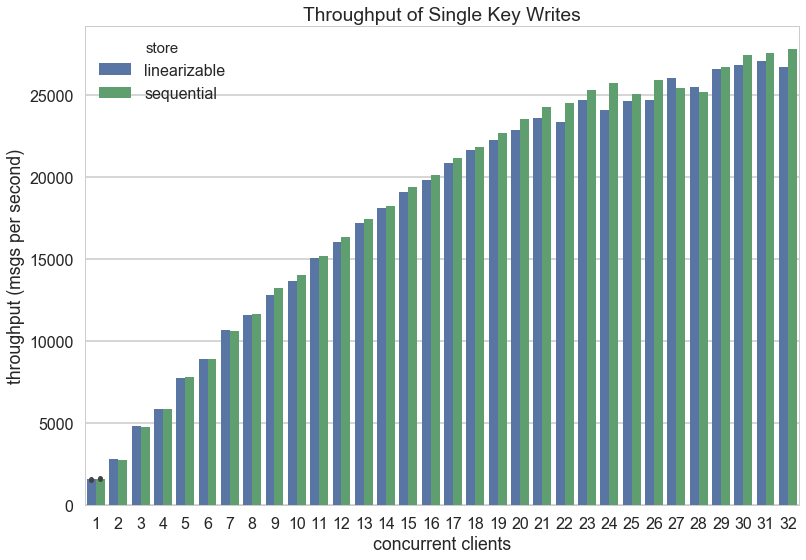

In [10]:
# Plot lin vs. sequential in the single key case. 
g = sns.barplot(x='clients', y='throughput', hue='store', data=data[data.multikey == False])
g.set_title("Throughput of Single Key Writes")
g.set_ylabel("throughput (msgs per second)")
g.set_xlabel("concurrent clients")
plt.savefig('figures/single-key-throughput.png')

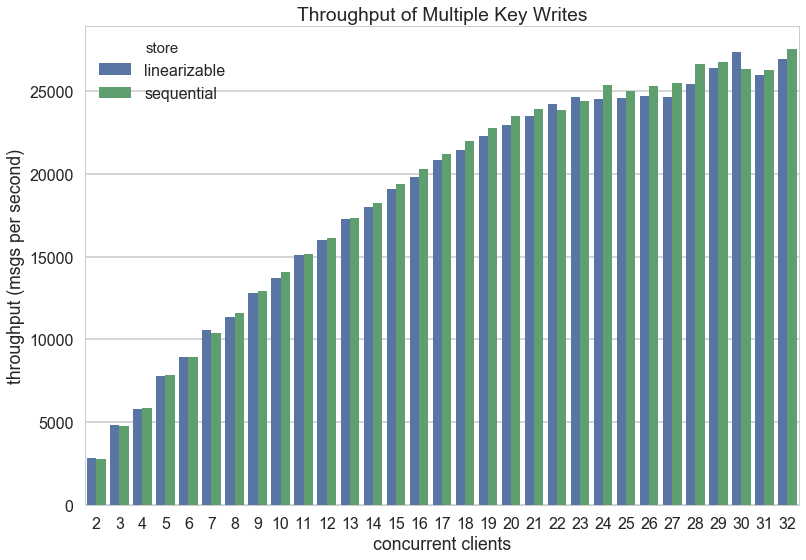

In [11]:
# Plot lin vs. sequential in the multi-key case. 
g = sns.barplot(x='clients', y='throughput', hue='store', data=data[data.multikey == True])
g.set_title("Throughput of Multiple Key Writes")
g.set_ylabel("throughput (msgs per second)")
g.set_xlabel("concurrent clients")
plt.savefig('figures/multi-key-throughput.png')

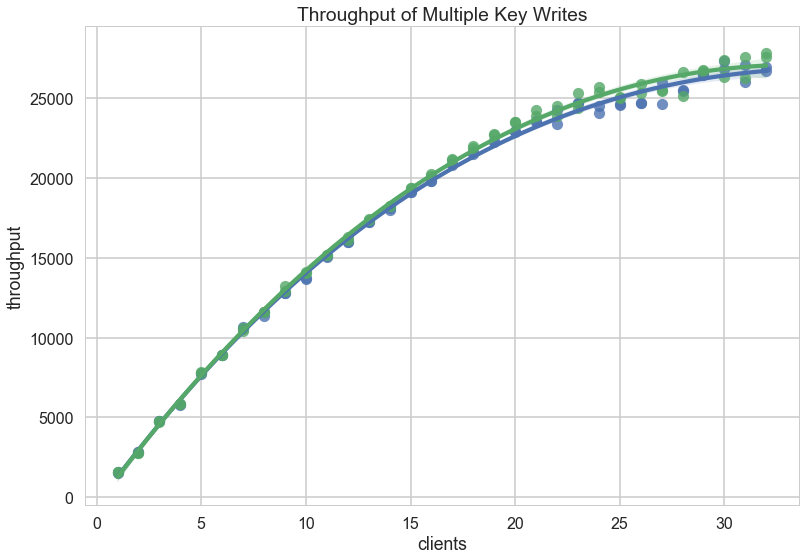

In [23]:
# Plot lin vs. sequential in the multi-key case. 
fig, ax = plt.subplots() 
g = sns.regplot(x='clients', y='throughput', order=3, data=data[data.store == "linearizable"], truncate=True, ax=ax)
g = sns.regplot(x='clients', y='throughput', order=3, data=data[data.store == "sequential"], truncate=True, ax=ax)
ax.set_title("Throughput of Multiple Key Writes")
# g.set_ylabel("throughput (msgs per second)")
# g.set_xlabel("concurrent clients")
# plt.savefig('figures/multi-key-throughput.png')